In [1]:
# -*- coding: utf-8 -*-

#
#  Gramáticas Formales para el Lenguaje Natural
#  Grupo de PLN (InCo) - 2016
#
#  Entrega 2 - Treebanks, PCFG y Parsing
#
#  Este template define clases por sección y tiene metodos a ser completados.
#  Completar las secciones siguiendo su especificación y la letra de la entrega.
#
#
#  Grupo: XX
#
#  Estudiante 1: Santiago Paez Castro - 4.848.301-0
#  Estudiante 2:
#  Estudiante 3:
#
#

In [2]:
import nltk
import ancora  #(Modulo para leer AnCora)
from __future__ import division

In [3]:

# Parte 1 - Corpus
###################

class Corpus:
    """
    Clase de funcionalidades sobre el corpus AnCora.
    """

    def __init__(self, corpus_path='./ancora/ancora-2.0/'):
        # Cargar corpus desde 'corpus_path'
        self.corpus =  ancora.AncoraCorpusReader(corpus_path)
        self.lemas = self.corpus.stemmed_words()

    ## Parte 1.1
    # a.
    def cant_oraciones(self):
        """
        Retorna la cantidad de oraciones del corpus.
        """
        return  len(self.corpus.tagged_sents())

    # b.
    def oracion_mas_larga(self):
        """
        Retorna la oracion mas larga.
        (la primera si hay mas de una con el mismo largo)
        """
        word_count = lambda sentence: len(sentence)
        return ' '.join(max(self.corpus.sents(), key=word_count))

    # c.
    def largo_promedio_oracion(self):
        """
        Retorna el largo de oracion promedio.
        """
        return  len(self.corpus.tagged_words())/len(self.corpus.tagged_sents())

    # d.
    def palabras_frecs(self):
        """
        Retorna un diccionario (dict) palabra-frecuencia de las palabras del corpus.
        (considerar las palabras en minúsculas)
        """
        
        return dict(nltk.FreqDist([t[0].lower() for t in self.corpus.tagged_words()]))
        

    # e.
    def palabras_frecs_cat(self):
        """
        Retorna un diccionario (dict) palabra-lista de las palabras del corpus.
        Cada lista contiene la frecuencia por cada categoría de la palabra.
        (considerar las palabras en minúsculas)
        """
        from collections import defaultdict
        
        dicc1 = dict(nltk.FreqDist([(w.lower(), c) for (w, c) in self.corpus.tagged_words()]))

        dicc2 = defaultdict(list)
        for k, v in dicc1.iteritems():
            dicc2[k[0]].append((k[1], v))
        
        return dict(dicc2)
    
    def obtener_lema(self, palabra):
        """
        Retorna el lema de la palabra pasada por parametro.
        El lema es el que se encuentra en el corpus AnCora.
        """
        return self.lemas[palabra].lower()
    
    
    ## Parte 1.2
    # a
    def arbol_min_nodos(self):
        """
        Retorna el árbol del corpus con la mínima cantidad de nodos.
        (el primero si hay mas de uno con la misma cantidad)
        """
        trees = self.corpus.parsed_sents()

        helper = [(index, len(t.treepositions())) for index, t in enumerate(trees)]
        helper.sort(key=lambda x: x[1])
        
        return trees[helper[0][0]]

    def arbol_max_nodos(self):
        """
        Retorna el árbol del corpus con la máxima cantidad de nodos.
        (el primero si hay mas de uno con la misma cantidad)
        """
        trees= self.corpus.parsed_sents()
        
        helper = [(index, len(t.treepositions())) for index, t in enumerate(trees)]
        helper.sort(key=lambda x: x[1])
        
        return trees[helper[-1][0]]


    # b
    def arboles_con_lema(self, lema):
        """
        Retorna todos los árboles que contengan alguna palabra con lema 'lema'.
        """
        
        return [t for t in self.corpus.parsed_sents() if lema in map(lambda x: self.obtener_lema(x.lower()), t.leaves())]

        


In [4]:
corpus = Corpus()
corpus.cant_oraciones()

3492

In [5]:
s = corpus.oracion_mas_larga()
print s
print
print "Cantidad de palabras en la oracion mas larga: " + str(len(nltk.word_tokenize(s))) + "."

Saltaron juntos a la NBA en 1992 , y ahí se ha podido ver que a Day le cuesta convertirse en el nuevo Sean_Elliott ( va progresando en Milwaukee , pero sigue sin meter mucho más del 40_% de sus tiros ) , que Mayberry se ve limitado ( en el mismo equipo de los Bucks ) por su propensión a anotar más_que a dirigir , y sólo es el suplente de Eric_Murdock mientras que finalmente puede ser el menos - glamouroso - del trío , Miller , el que más favorablemente esté sorprendiendo en la Liga profesional : la semana pasada fue por primera vez - jugador de la semana - en la NBA , y pese_a su talla modesta de 2,05 ( pero con una envergadura de casi 2,20 ) está resolviendo el agujero de los Suns en el pívot .

Cantidad de palabras en la oracion mas larga: 144.


In [6]:
corpus.largo_promedio_oracion()

27.144043528064145

In [7]:
dic = corpus.palabras_frecs()

import operator

sorted_dic = sorted(dic.items(), key=operator.itemgetter(1))
sorted_dic.reverse()
for i in sorted_dic:
    print i

(',', 5543)
('de', 5056)
('la', 3400)
('.', 3365)
('el', 2706)
('que', 2632)
('y', 2281)
('en', 2108)
('los', 1618)
('a', 1467)
('-', 1119)
('se', 1090)
('un', 1087)
('del', 1016)
('las', 959)
('una', 826)
('no', 822)
('con', 784)
('por', 729)
('su', 679)
('es', 641)
('"', 612)
('para', 582)
('como', 451)
('lo', 435)
('al', 426)
(u'm\xe1s', 412)
('o', 321)
('pero', 320)
(')', 318)
('(', 318)
('sus', 285)
(':', 282)
('ha', 281)
('le', 202)
('entre', 175)
('si', 154)
('ser', 146)
('cuando', 146)
('son', 145)
('este', 143)
('sobre', 140)
(u'a\xf1os', 139)
('ya', 139)
('hasta', 136)
('han', 132)
('dos', 126)
('sin', 126)
('desde', 126)
('?', 124)
('todo', 121)
(u'hab\xeda', 119)
('era', 119)
('porque', 118)
(u'tambi\xe9n', 117)
(';', 114)
(u'est\xe1', 113)
('nos', 112)
('fue', 104)
('hay', 101)
('esta', 100)
('muy', 100)
('puede', 96)
('hoy', 95)
(u's\xf3lo', 95)
('hace', 90)
('me', 86)
('otro', 85)
('ni', 85)
('vida', 85)
(u'\xe9l', 84)
(u'qu\xe9', 84)
('tan', 83)
('uno', 80)
('donde', 80

In [8]:
corpus.palabras_frecs_cat()

{'parroquias': [('ncfp000', 1)],
 'bloqueos': [('ncmp000', 1)],
 u'estim\xf3': [('vmis3s0', 1)],
 'umts': [('np0000a', 2)],
 'tildado': [('aq0msp', 1)],
 u'agreg\xf3': [('vmis3s0', 9)],
 u'form\xf3': [('vmis3s0', 1)],
 'volantes': [('aq0cp0', 2)],
 u'te\xf3ricamente': [('rg', 1)],
 u'sefard\xed': [('aq0cs0', 2)],
 'al_contado': [('rg', 1)],
 'de_golpe': [('rg', 2)],
 u'aristocr\xe1ticas': [('aq0fp0', 1)],
 'igual': [('rg', 5), ('aq0cs0', 11)],
 'ciudades': [('ncfp000', 8)],
 u't\xeda': [('ncfs000', 2)],
 'observadores': [('ncmp000', 8)],
 'servesa': [('ncfs000', 1)],
 'hermana': [('ncfs000', 5)],
 'hermano': [('ncms000', 7)],
 u'est\xe9riles': [('aq0cp0', 1)],
 u'urbanizaci\xf3n': [('ncfs000', 1)],
 'alimentada': [('aq0fsp', 1)],
 u't\xedo': [('ncms000', 2)],
 'nobleza': [('ncfs000', 3)],
 u'cul\xe9': [('nccs000', 1)],
 'investigaron': [('vmis3p0', 1)],
 u'atrev\xeda': [('vmii3s0', 2)],
 'bill_clinton': [('np0000p', 7)],
 'compuesta': [('aq0fsp', 2)],
 'compuesto': [('ncms000', 1), ('v

In [9]:
corpus.palabras_frecs_cat()["otro"]

[('di0ms0', 54), ('pi0ms000', 31)]

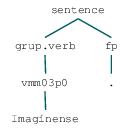

In [10]:
corpus.arbol_min_nodos()

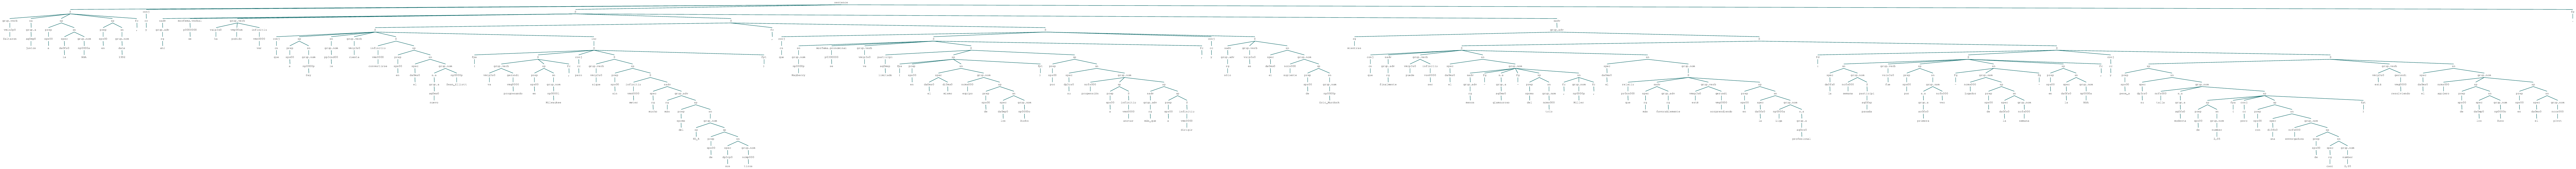

In [11]:
corpus.arbol_max_nodos()

74


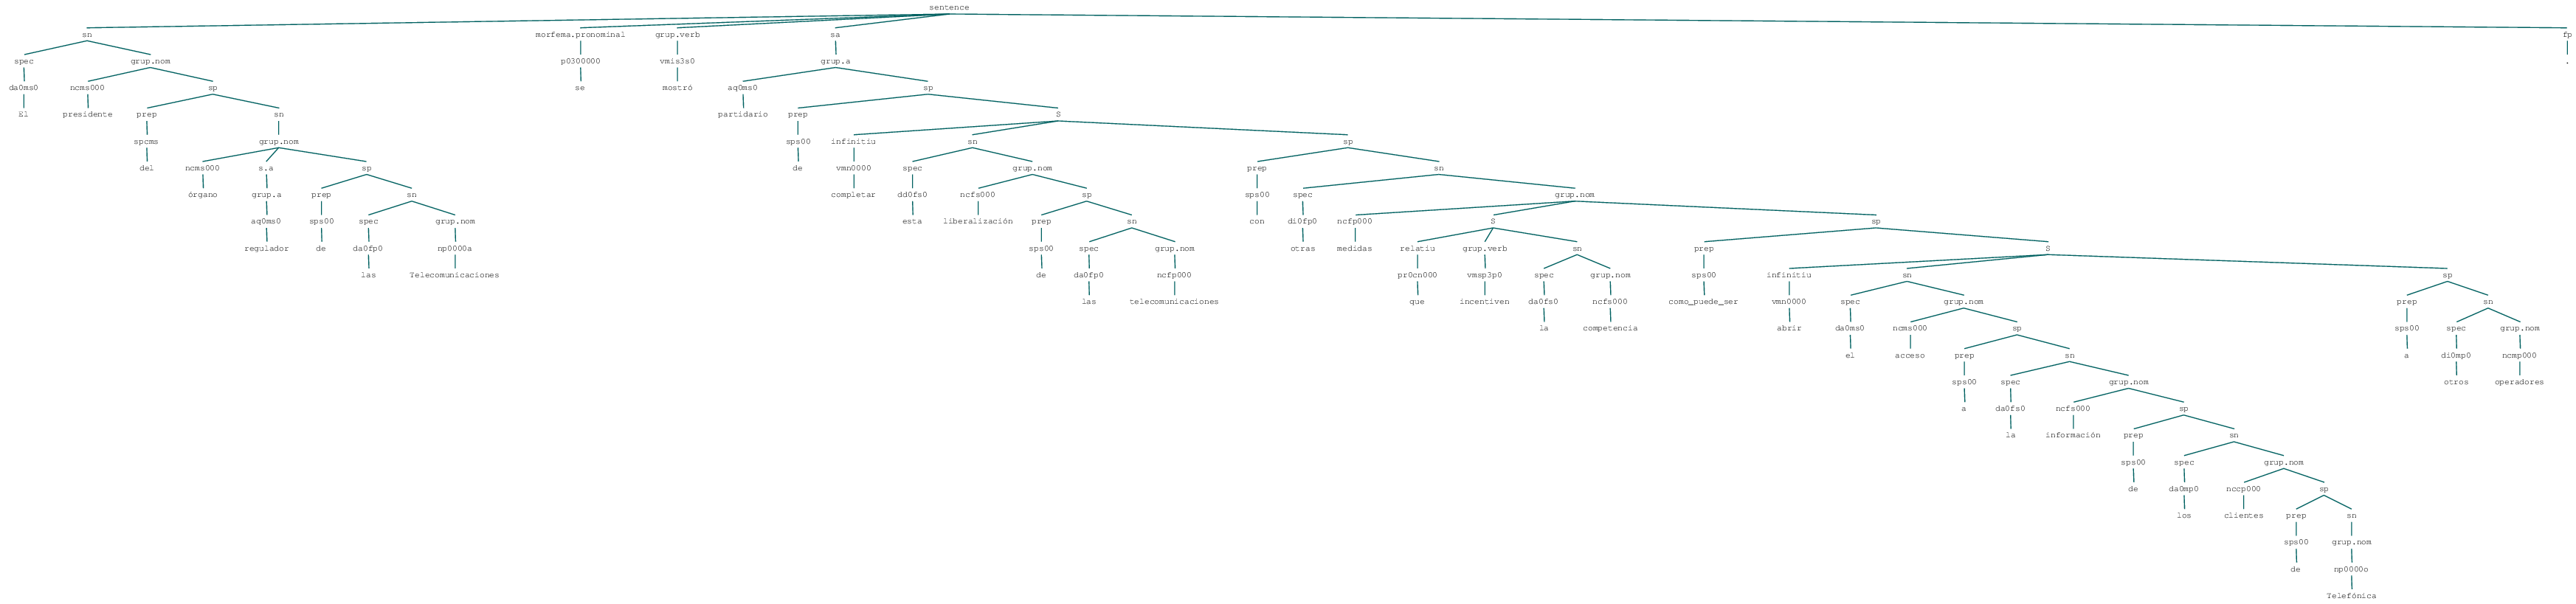

In [12]:
arboles = corpus.arboles_con_lema("presidente")

print len(arboles)
arboles[0]

In [13]:
# Parte 2 - PCFG y Parsing
###########################


class PCFG:
    """
    Clase de funcionalidades sobre PCFG de AnCora.
    """

    sents = [   u'El juez manifestó que las medidas exigidas por el gobierno actual son muy severas .', #a
                u'El partido entre los equipos europeos tendrá lugar este viernes .', #b
                u'El domingo próximo se presenta la nueva temporada de ópera .', #c
            ]

    def __init__(self):
        corpus = Corpus()
        self.wordfrecs = corpus.palabras_frecs()
        self.grammar = self._induce_pcfg(corpus)
        self.parser  = self._generate_parser()

    ## Parte 2.1 (grammar)
    def _induce_pcfg(self, corpus):
        """
        Induce PCFG del corpus.
        """
        
        productions = []
        S = nltk.Nonterminal('sentence')
        for tree in corpus.corpus.parsed_sents():
            # Trasnformamos los arboles para obtener las reglas en Forma Normal de Chomsky.
            #tree.collapse_unary(collapsePOS = True, collapseRoot = True)
            #tree.chomsky_normal_form(horzMarkov = 2)
            
            # Transformo todas las hojas del arbol a minuscula
            for t in tree.treepositions('leaves'):
                tree[t] = tree[t].lower()
            
            productions += tree.productions()

        return nltk.induce_pcfg(S, productions)

    # a
    def reglas_no_lexicas(self):
        """
        Retornas las reglas que no son léxicas.
        """
        return [regla for regla in self.grammar.productions() if regla.is_nonlexical()]

    # b 
    def categorias_lexicas(self):
        """
        Retorna las categorías léxicas (se infieren de las reglas léxicas).
        """
        # La lista devuelta no tiene elementos repetidos.
        set_categorias = set([regla.rhs()[0] for regla in self.grammar.productions() if regla.is_lexical()])
        lista_categorias = list(set_categorias)
        return lista_categorias
        

    # c
    def reglas_lexicas(self, c):
        """
        Retorna las reglas léxicas de categoría 'c'
        """
        # Debe recibir un string, se realiza la conversion a simbolo no-terminal dentro de la funcion.
        return [regla for regla in self.grammar.productions() if regla.is_lexical() and regla.lhs() == nltk.Nonterminal(c)]

    ## Parte 2.2 (parser)
    def _generate_parser(self):
        """
        Generate Viterbi parser from grammar.
        """
        return nltk.ViterbiParser(self.grammar)

    ## Parte 2.3 (sentences)
    def parse(self, sentence):
        """
        Parse sentence and return ProbabilisticTree.
        """
        # TODO: Tratar el caso cuando hay palabras en la oracion que no esten en la gramatica.
        
        tokens = [w.lower() for w in nltk.word_tokenize(sentence)]
        
        return self.parser.parse_one(tokens)


In [14]:
# Parte 2.3

# Probabilidades sin unary_collapse:
# pcfg.sents[0] = 3.89717e-43
# pcfg.sents[1] = 8.48939e-34

# Probabilidades con unary_collapse:
# pcfg.sents[0] = 9.04457582836e-37
# pcfg.sents[1] = 7.02920468181e-34

# Creo la instancia de la clase PCFG.
pcfg = PCFG()

Probabilidad: 4.85908523089e-42


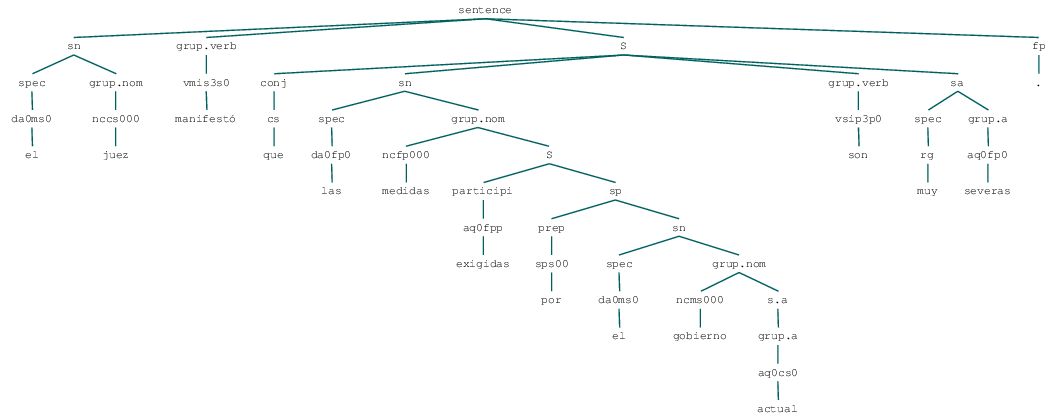

In [15]:
t = pcfg.parse(pcfg.sents[0])
print "Probabilidad: " +  str(t.prob())
t

Probabilidad: 9.37237001645e-33


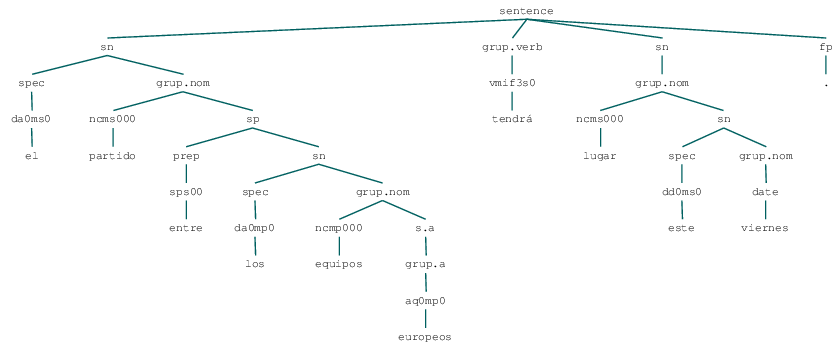

In [16]:
t = pcfg.parse(pcfg.sents[1])
print "Probabilidad: " + str(t.prob())
t

In [17]:
try:
    pcfg.parse(pcfg.sents[2])
except ValueError:
    print "ERROR: La gramatica del parser no posee alguna/s de las palabras de la oracion."

# El parser falla debido a que la gramatica no conoce la palabra "opera".

La gramatica del parser no posee alguna/s de las palabras de la oracion.


In [18]:
# Parte 3 - PCFG con palabras desconocidas
##########################################


class PCFG_UNK(PCFG):
    """
    Clase de funcionalidades sobre PCFG de AnCora con UNK words.
    """

    sents = [   u'El domingo próximo se presenta la nueva temporada de ópera .', #a (2.3.c)
                u'Pedro y Juan jugarán el campeonato de fútbol .', #b 
            ]


    # Parte 3.1
    def _induce_pcfg(self, corpus):
        """
        Induce PCFG grammar del corpus (treebank) considerando palabras UNK.
        """
        
        unk_words = {k for k,v in self.wordfrecs.iteritems() if v == 1}
        
        productions = []
        for tree in corpus.corpus.parsed_sents():
            # Trasnformamos los arboles para obtener las reglas en Forma Normal de Chomsky.
            #tree.collapse_unary(collapsePOS = True, collapseRoot = True)
            #tree.chomsky_normal_form(horzMarkov = 2)
            
            # Transformo todas las hojas a minusculas.
            for t in tree.treepositions('leaves'):
                tree[t] = tree[t].lower()
            
            productions += tree.productions()

        new_productions = []
        for pr in productions:
            if len(pr.rhs()) == 1 and pr.rhs()[0] in unk_words:
                new_pr = nltk.grammar.Production(pr.lhs(), ['UNK'])
                new_productions.append(new_pr)
            else:
                new_productions.append(pr)
        
        S = nltk.Nonterminal('sentence')
        
        return nltk.induce_pcfg(S, new_productions)


    # Parte 3.2 (y 3.3)

    def parse(self, sentence):
        """
        Retorna el análisis sintáctico de la oración contemplando palabras UNK.
        """
        tokens = [w.lower() for w in nltk.word_tokenize(sentence)]
        
        all_words = {k for k,v in self.wordfrecs.iteritems()}
        
        unk_words = {k for k,v in self.wordfrecs.iteritems() if v == 1}
        
        unk_tokens = [w if w not in unk_words and w in all_words else "UNK" for w in tokens]
        
        return self.parser.parse_one(unk_tokens)



In [19]:
# Parte 3.3
pcfg_unk = PCFG_UNK()

Probabilidad: 4.26288528837e-27


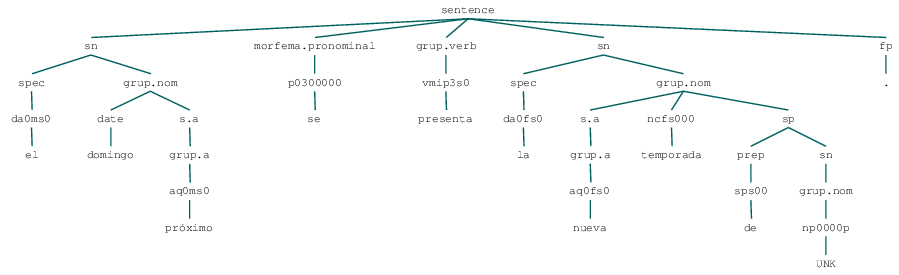

In [20]:
t = pcfg_unk.parse(pcfg_unk.sents[0])
print "Probabilidad: " + str(t.prob())
t

# En este caso, la unica palabra de la oracion que no se encuentra en la gramatica es "opera".
# Por lo que la palabra se cambia por "UNK" y el parser la identifica como un nombre comun.
# En este caso esta tecnica (cambiar palabras desconocidas por "UNK") produce un buen resultado.

Probabilidad: 3.31965694887e-16


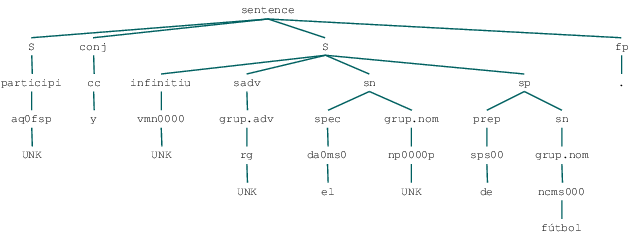

In [21]:
# Parte 3.3
t = pcfg_unk.parse(pcfg_unk.sents[1])
print "Probabilidad: " + str(t.prob())
t

# En este caso, existen cuatro palabras que no se encuentran en el corpus y por ende son cambiadas por "UNK".
# Dichas palabras son: pedro, juan, jugaran y campeonato.
# El resultado que obtiene el parser no es bueno en este caso, no ayuda el hecho de que la mitad de la oracion
# este compuesta por palabras desconocidas.

In [22]:
# Parte 3.4

'''
El uso de una tecnica como la utilizada en las partes 3.1 y 3.2 permite que nuestro parser sea capaz de procesar 
oraciones que tengan palabras que no se encuentren en el corpus utilizado.
Poder analizar oraciones con palabras desconocidas es una buena propiedad para un parser, ya que independientemente
del tamanio del corpus utilizado para deducir las reglas de la gramatica, es dificil que dicho corpus posea todas las
palabras del vocabulario.

Como vimos en las oraciones de ejemplo analizadas, esta tecnica produce resultados de variada calidad. A medida que 
que aumente la proporcion de palabras desconocidas en una oracion, resultara mas dificil para el parser realizar un
analisis de calidad.

Otro problema de esta tecnica es que al agrupar todas las reglas de palabras poco frecuentes como "UNK", corremos el
riesgo de clasificar erroneamente algunas palabras. Esto sucede por ejemplo con la palabra "juan", la cual en el
analisis obtenido es clasificada como un verbo, cuando en realidad es un nombre propio.

Un enfoque alternativo podria ser el de analizar las palabras desconocidas de la oracion. Por ejemplo los nombres
propio comienzan con mayuscula, como Pedro y Juan (con la salvedad de que en este caso Pedro se encuentra al comienzo
de la oracion, donde resulta ambiguo su analisis), jugaran es una variacion del verbo jugar, el cual se encuentra en el 
corpus y por lo tanto podria ser etiquetado como verbo.
Aplicar este enfoque tiene una parte negativa, es necesario, una vez determinadas las categorias de las palabras
desconocidas encontradas en la oracion a analizar, hay que agregar dichas reglas a la gramatica y hay que volver a 
inferir el parser (actividades que son computacionalmente costosas).
'''


'\nEl uso de una tecnica como la utilizada en las partes 3.1 y 3.2 permite que nuestro parser sea capaz de procesar \noraciones que tengan palabras que no se encuentren en el corpus utilizado.\nPoder analizar oraciones con palabras desconocidas es una buena propiedad para un parser, ya que independientemente\ndel tamanio del corpus utilizado para deducir las reglas de la gramatica, es dificil que dicho corpus posea todas las\npalabras del vocabulario.\n\nComo vimos en las oraciones de ejemplo analizadas, esta tecnica produce resultados de variada calidad. A medida que \nque aumente la proporcion de palabras desconocidas en una oracion, resultara mas dificil para el parser realizar un\nanalisis de calidad.\n\nOtro problema de esta tecnica es que al agrupar todas las reglas de palabras poco frecuentes como "UNK", corremos el\nriesgo de clasificar erroneamente algunas palabras. Esto sucede por ejemplo con la palabra "juan", la cual en el\nanalisis obtenido es clasificada como un verbo, cu

In [23]:
# Parte 4 - PCFG lexicalizada
##############################

# 4.1

from nltk.stem.snowball import SpanishStemmer

class PCFG_LEX(PCFG):
    """
    PCFG de AnCora con lexicalización en primer nivel.
    """

    sents = [   u'El juez vino que avión .', #
            ]                

    def _induce_pcfg(self, corpus):
        """
        Induce PCFG del corpus considerando lexicalización en primer nivel.
        """
        
        #stemmer = SpanishStemmer()
        
        S = nltk.Nonterminal('sentence')
        
        arboles = []
        for tree in corpus.corpus.parsed_sents():
            # Trasnformamos los arboles para obtener las reglas en Forma Normal de Chomsky.
            #tree.collapse_unary(collapsePOS = True, collapseRoot = True)
            #tree.chomsky_normal_form(horzMarkov = 2)
            arboles.append(tree.copy())      
    
        # Hago parent annotation del nivel superior a las hojas utilizando el lema de la hoja.
        productions = []
        for arbol in arboles:
            for t in arbol.treepositions('leaves'):
                arbol[t] = arbol[t].lower()
                t_p = tuple(x[1] for x in enumerate(t) if x[0] != len(t)-1)
                arbol[t_p].set_label(arbol[t_p].label() + "#" + corpus.obtener_lema(arbol[t]))
            productions.extend(arbol.productions())


        return nltk.induce_pcfg(S, productions)



In [53]:
# Si da el tiempo, probar los resultados obtenidos al utilizar este stemmer

from nltk.stem.snowball import SpanishStemmer
stemmer = SpanishStemmer()

stemmer.stem('jugando')

pr = pcfg.grammar.productions()[0]

a = pr.lhs()
a._symbol = 'spec#jug'a

spec#jug

In [24]:
pcfg_lex = PCFG_LEX()

Probabilidad: 2.46053223278e-18


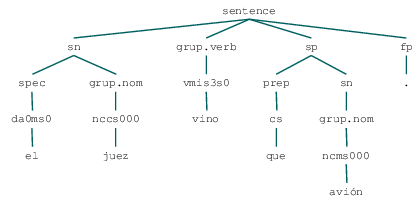

In [25]:
t = pcfg.parse(pcfg_lex.sents[0])
print "Probabilidad: " + str(t.prob())
t

In [26]:
pcfg_lex.parse(pcfg_lex.sents[0])

# No logra parsear la oracion.

Probabilidad4.35600868113e-40


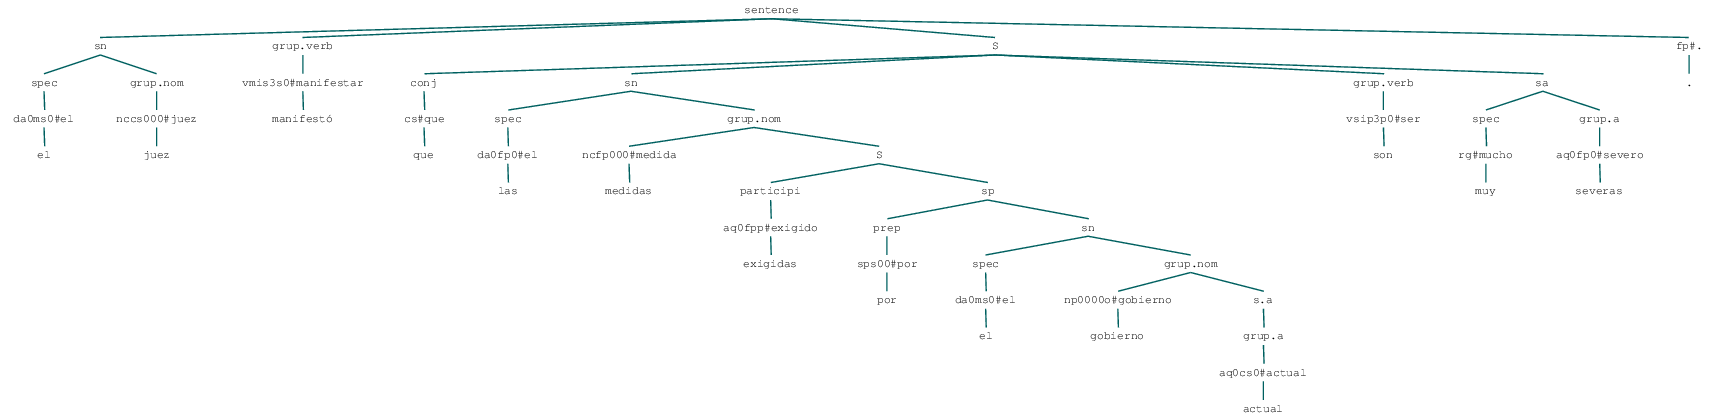

In [27]:
t = pcfg_lex.parse(pcfg.sents[0])
print "Probabilidad" + str(t.prob())
t

Probabilidad: 5.90744321004e-34


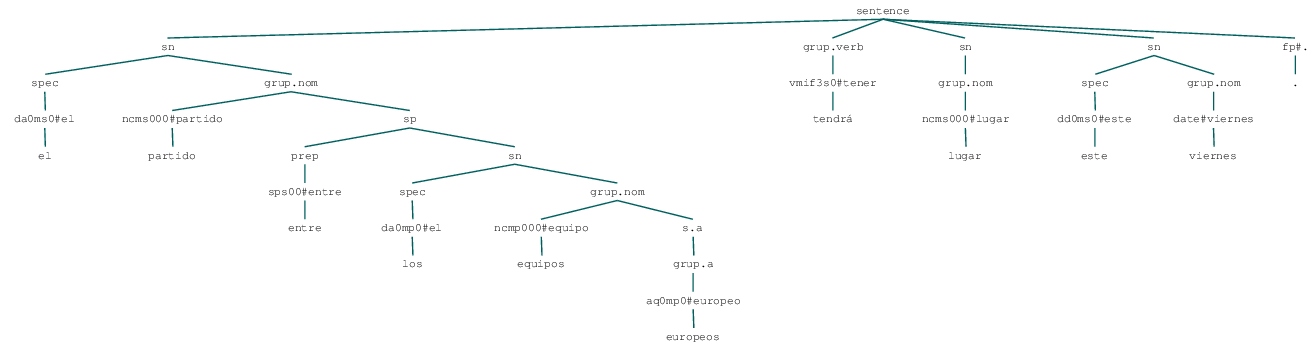

In [28]:
t = pcfg_lex.parse(pcfg.sents[1])
print "Probabilidad: " + str(t.prob())
t

In [29]:
# 4.2

class PCFG_LEX_VERB(PCFG):
    """
    PCFG de AnCora con lexicalización en primer nivel y grupos verbales (grup.verb).
    """

    sents = [   u'El juez manifestó su apoyo al gobierno .', # i
                u'El juez opinó su apoyo al gobierno .', # ii

                u'El juez manifestó que renunciará .', # 4.2.c
            ]                

    def _induce_pcfg(self, corpus):
        """
        Induce PCFG del corpus considerando lexicalización en primer nivel y grupos verbales.
        """
        S = nltk.Nonterminal('sentence')
        
        # Hago parent annotation del nivel superior a las hojas utilizando el lema de la hoja.
        productions = []
        for arbol in corpus.corpus.parsed_sents():
            for t in arbol.treepositions('leaves'):
                arbol[t] = arbol[t].lower()
                t_p = tuple(x[1] for x in enumerate(t) if x[0] != len(t)-1)
                arbol[t_p].set_label(arbol[t_p].label() + "#" + corpus.obtener_lema(arbol[t]))
                verbo = corpus.obtener_lema(arbol[t])
                if verbo.endswith(("ar", "er", "ir",)) and "_" not in verbo:
                    t_p2 = tuple(x[1] for x in enumerate(t_p) if x[0] != len(t_p)-1)
                    if arbol[t_p2].label() == "grup.verb":
                        arbol[t_p2].set_label(arbol[t_p2].label() + "#" + verbo)
            productions.extend(arbol.productions())

        return nltk.induce_pcfg(S, productions)


In [30]:
pcfg_lex_verb = PCFG_LEX_VERB()

Probabilidad: 5.99570919757e-20


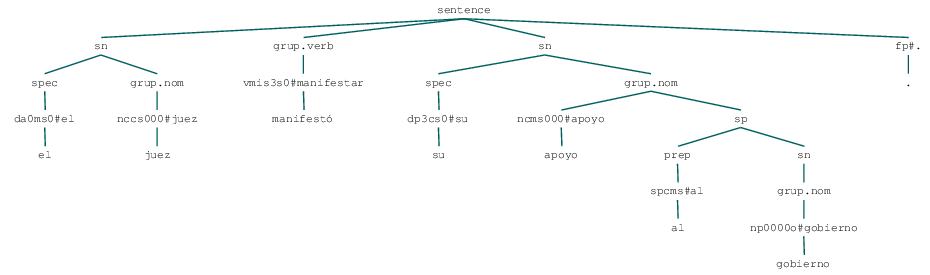

In [31]:
t = pcfg_lex.parse(pcfg_lex_verb.sents[0])
print "Probabilidad: " + str(t.prob())
t

Probabilidad: 3.42611954147e-20


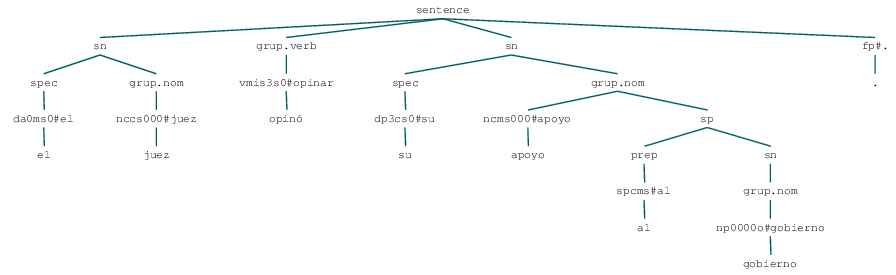

In [32]:
t = pcfg_lex.parse(pcfg_lex_verb.sents[1])
print "Probabilidad: " + str(t.prob())
t

Probabilidad: 2.64092049459e-19


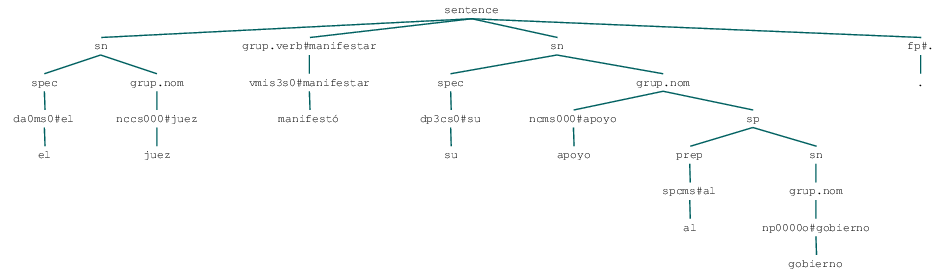

In [33]:
t = pcfg_lex_verb.parse(pcfg_lex_verb.sents[0])
print "Probabilidad: " + str(t.prob())
t

In [34]:
pcfg_lex_verb.parse(pcfg_lex_verb.sents[1])

# No logra parsear la oracion.

Probabilidad: 3.81837691253e-16


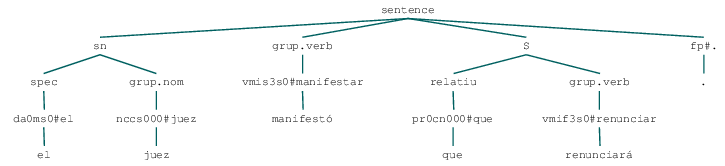

In [35]:
t = pcfg_lex.parse(pcfg_lex_verb.sents[2])
print "Probabilidad: " + str(t.prob())
t

In [36]:
pcfg_lex_verb.parse(pcfg_lex_verb.sents[2])

# No logra parsear la oracion.